# Tranformers

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from d2l import torch as d2l

In [103]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

## 11.1.3 Exercises

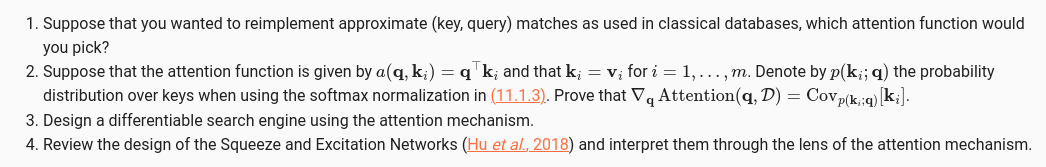

##### 1. Scale dot product attention as it aproximates values by q and k similarity

##### 2. 

##### 3. 

## 11.2.5 Exercises

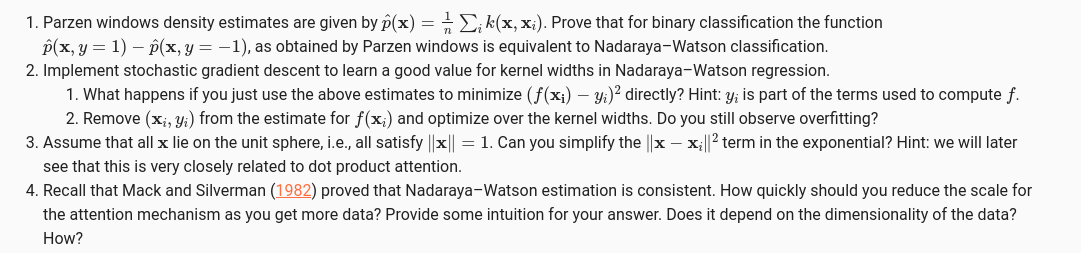

##### 1.

##### 4. Each datapoints contributes for the k increase, as nadaray calculate attention weights k/sum(k), sum k grows more than k, attention lenght decreases. Supose that each kernel dists(k) increased x, the increase of sum(k) will be n*k as a one dimensional. And so a attention decrease of n²,n³ for dimension added.

## 11.3.6 Exercises

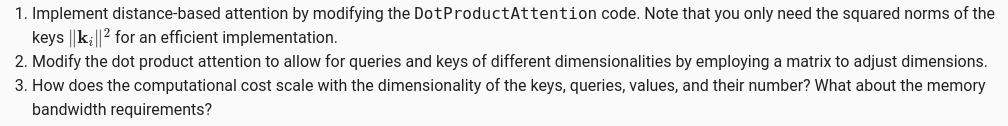

##### 1.

In [ ]:
#Code for 1.

##### 2.

In [ ]:
#code for 2.

##### 3.

## 11.4.5 Exercises

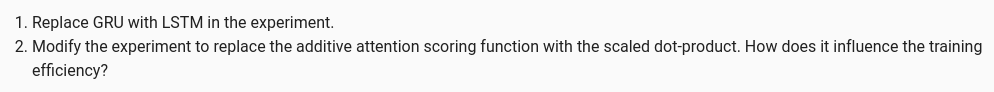

## 11.5.4 Exercises

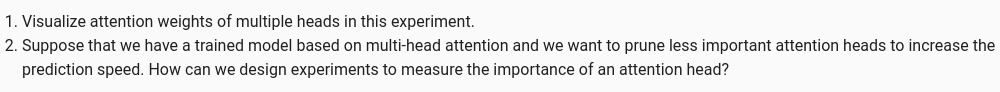

## 11.6.5 Exercises

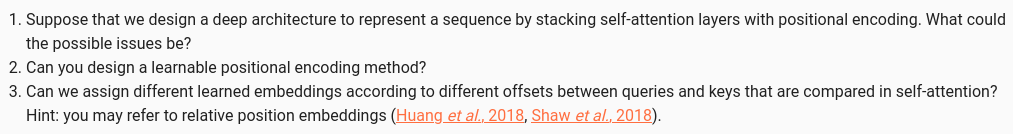

## 11.7.8 Exercises

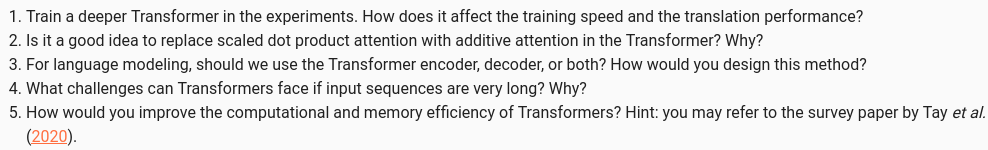

##### 1. 

In [ ]:
#Code for 1.

##### 2. 

##### 3. Decoder, it's general enough to perform various language modeling activities. ...

##### 4. The longer the inputs the bigger the time cust, more multiplications to do.

##### 5.

## 11.8.7 Exercises

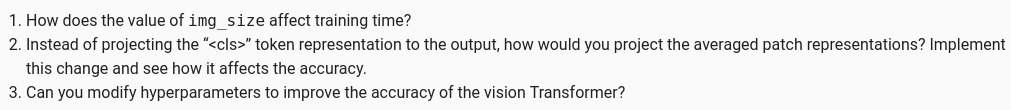

##### 1. Training is affect to the square of image size since ... 

##### 2.

##### 3. Yes, the patch size, cls.